# Metrics to Compare Two Distributions

In [80]:
from pathlib import Path
import sys
sys.path.insert(0, str(Path.cwd().parent))

In [81]:
import numpy as np
import scipy.stats as st
import scipy.special as spl
import scipy.spatial as sptl
import matplotlib.pyplot as plt
from src.random_sample import sample_lognormal_mean_rsd, sample_gamma_mean_rsd

In [82]:
mean, rsd = 50.33, 0.5
n_samples = 1000

In [93]:
dist_1 = np.random.normal(mean, 0.5*rsd*mean, n_samples)
dist_2 = sample_lognormal_mean_rsd(2*mean, rsd, n_samples)
dist_3 = sample_gamma_mean_rsd(mean, 0.25*rsd, n_samples)
dist_4 = 6 * mean - dist_2

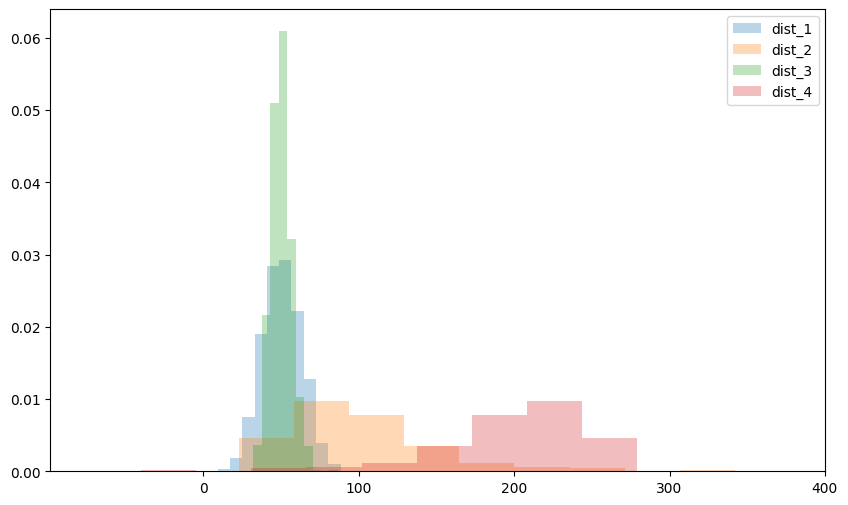

In [94]:
plt.figure(figsize=(10, 6))
plt.hist(dist_1, density=True, alpha=0.3, label="dist_1")
plt.hist(dist_2, density=True, alpha=0.3, label="dist_2")
plt.hist(dist_3, density=True, alpha=0.3, label="dist_3")
plt.hist(dist_4, density=True, alpha=0.3, label="dist_4")
plt.legend()
plt.show()

## Wasserstein distance

In [95]:
st.wasserstein_distance(dist_1, dist_2)

np.float64(51.166025173716825)

In [96]:
st.wasserstein_distance(dist_2, dist_3)

np.float64(52.0600390120291)

In [97]:
st.wasserstein_distance(dist_1, dist_3)

np.float64(5.060791969570184)

In [98]:
st.wasserstein_distance(dist_3, dist_4)

np.float64(151.81935994549667)

In [99]:
st.wasserstein_distance(dist_1, dist_4)

np.float64(150.94747801879663)

## KL Divergence

In [100]:
spl.kl_div(dist_1, dist_2).sum()

np.float64(22767.51300286625)

In [101]:
spl.kl_div(dist_2, dist_3).sum()

np.float64(32717.13122540542)

In [102]:
spl.kl_div(dist_1, dist_3).sum()

np.float64(2034.2339168273131)

In [103]:
spl.kl_div(dist_1, dist_4).sum()

np.float64(inf)

## Jensen-Shannon Divergence

In [104]:
sptl.distance.jensenshannon(dist_1, dist_2).sum()

np.float64(0.18342567845629096)

In [105]:
sptl.distance.jensenshannon(dist_2, dist_3).sum()

np.float64(0.17017781443277133)

In [106]:
sptl.distance.jensenshannon(dist_1, dist_3).sum()

np.float64(0.10111166950259334)

In [107]:
sptl.distance.jensenshannon(dist_1, dist_4).sum()

np.float64(inf)